<a href="https://colab.research.google.com/github/niteshavagabond/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [205]:
# importing libraries
import pandas as pd               #importing pandas
import numpy as np                #importing numpy
from numpy import math
import seaborn as sns             #importing seaborn
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
# plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = (10,6)
import math
from sklearn import neighbors

from sklearn import model_selection
from sklearn.model_selection import KFold

from xgboost import XGBRegressor                       # xgboost model
from sklearn.ensemble import RandomForestRegressor     # random forest model
from sklearn.svm import SVR                            # support vector regressor
from sklearn.linear_model import (Lasso, Ridge,        # regularization
ElasticNet, LassoCV, RidgeCV, ElasticNetCV)
from sklearn.model_selection import GridSearchCV       # grid search to optimize parameters

In [206]:
# mounting google drive
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [207]:
# loading dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Bike Sharing Demand Prediction - Nitesh Verma/SeoulBikeData.csv', encoding = "ISO-8859-1")

In [208]:
# top 5 rows
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [209]:
# last 5 rows
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [210]:
# shape of dataset
df.shape

(8760, 14)

## Steps of data processing
1. Deal with wrong datatype
2. Deal with null/missing values
3. Deal with duplicate data
4. Deal with multicollinearity
5. Deal with outliers
6. Extracting day, month, and day of week from Date column.

##1. Deal with wrong datatype 

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

* Total 14 features present in dataset where **Date column should be datetime dtype.**

In [212]:
# Date columns to Date format conversion

df['Date']= pd.to_datetime(df['Date'])

In [213]:
# statistical describtion (only numerical columns)
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

##2. Deal with null/missing values

In [214]:
# Checking null/missing values
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [215]:
# looking column names, datatype of features, null values, unique values and their number of unique values
df_columns_table=[[name,df[name].dtypes,df[name].isnull().sum(),round(df[name].isnull().sum()/len(df)*100, 2),
                   df[name].nunique(),df[name].unique()] for name in df.columns]
df_columns = pd.DataFrame(df_columns_table, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])
df_columns

Column           Dtype  Null  Null (%)  nUnique  \
0                        Date  datetime64[ns]     0       0.0      365   
1           Rented Bike Count           int64     0       0.0     2166   
2                        Hour           int64     0       0.0       24   
3             Temperature(°C)         float64     0       0.0      546   
4                 Humidity(%)           int64     0       0.0       90   
5            Wind speed (m/s)         float64     0       0.0       65   
6            Visibility (10m)           int64     0       0.0     1789   
7   Dew point temperature(°C)         float64     0       0.0      556   
8     Solar Radiation (MJ/m2)         float64     0       0.0      345   
9                Rainfall(mm)         float64     0       0.0       61   
10              Snowfall (cm)         float64     0       0.0       51   
11                    Seasons          object     0       0.0        4   
12                    Holiday          object     0       0.0        2   
13            Functioning Day          object     0       0.0        2   

                                               Unique  
0   [2017-01-12T00:00:00.000000000, 2017-02-12T00:...  
1   [254, 204, 173, 107, 78, 100, 181, 460, 930, 4...  
2   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
3   [-5.2, -5.5, -6.0, -6.2, -6.4, -6.6, -7.4, -7....  
4   [37, 38, 39, 40, 36, 35, 27, 24, 21, 23, 25, 2...  
5   [2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 1.1, 0.5, ...  
6   [2000, 1928, 1996, 1936, 793, 1913, 1687, 1380...  
7   [-17.6, -17.7, -18.6, -18.7, -19.5, -19.3, -19...  
8   [0.0, 0.01, 0.23, 0.65, 0.94, 1.11, 1.16, 1.01...  
9   [0.0, 0.5, 1.0, 2.5, 0.1, 0.2, 0.3, 0.7, 1.6, ...  
10  [0.0, 0.1, 0.3, 0.4, 0.2, 1.0, 0.9, 0.8, 0.7, ...  
11                   [Winter, Spring, Summer, Autumn]  
12                              [No Holiday, Holiday]  
13                                          [Yes, No]

* No null or missing values in dataset

##3. Deal with duplicate data

In [216]:
# we are going to find out, how many duplicate rows are their.
df[df.duplicated()].shape

(0, 14)

* No duplicate data is present in dataset

##4. Deal with multicollinearity

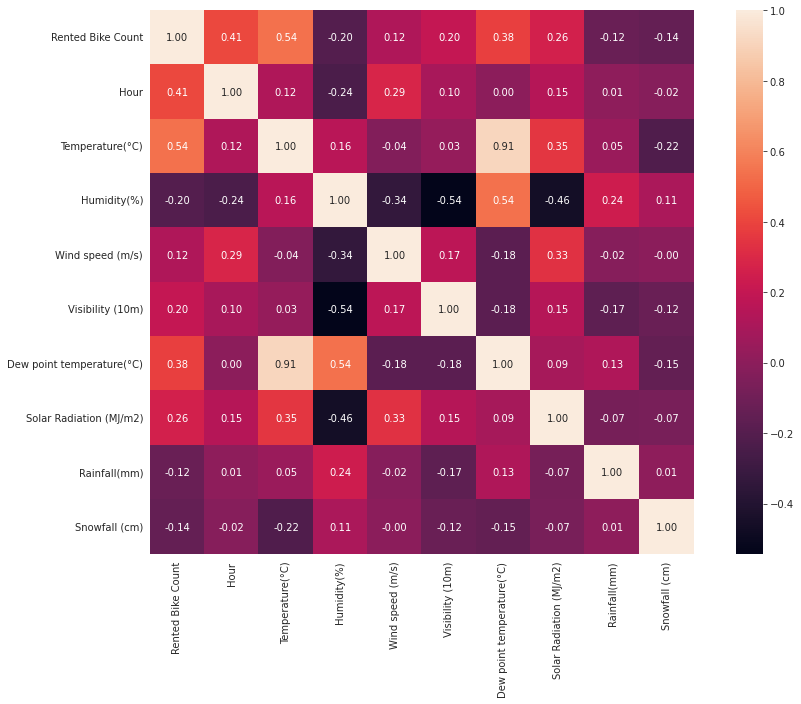

In [217]:
# ploting heat map finding correlation between columns
hdf = df.corr()

plt.subplots(figsize=(15, 10))
sns.heatmap(hdf,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=1, square=True);

* **Dew point temperature** and **Temperature** are **highly correlate**, Dew point temperature is very low positive correlated to Rented Bike Count and Temperature is positively correlated to Rented Bike Count, so we will **drop Dew point temperature column** from our dataset


In [218]:
# droping Dew point temperature(°C) column
df.drop('Dew point temperature(°C)', axis = 1, inplace = True)

In [219]:
# Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  '''
    Function to calculate VIF
  '''
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
  return(vif)

In [220]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count'] ]]).transpose()

0                1            2                 3  \
variables      Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)   
VIF        3.921832         3.228318     4.868221          4.608625   

                          4                        5             6  \
variables  Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)   
VIF                 4.71017                 2.246791      1.079158   

                       7  
variables  Snowfall (cm)  
VIF             1.120579

* values of **vif's** are **less than 5** which is acceptable, there is less chances of multicollinearity

##5. Deal with outliers

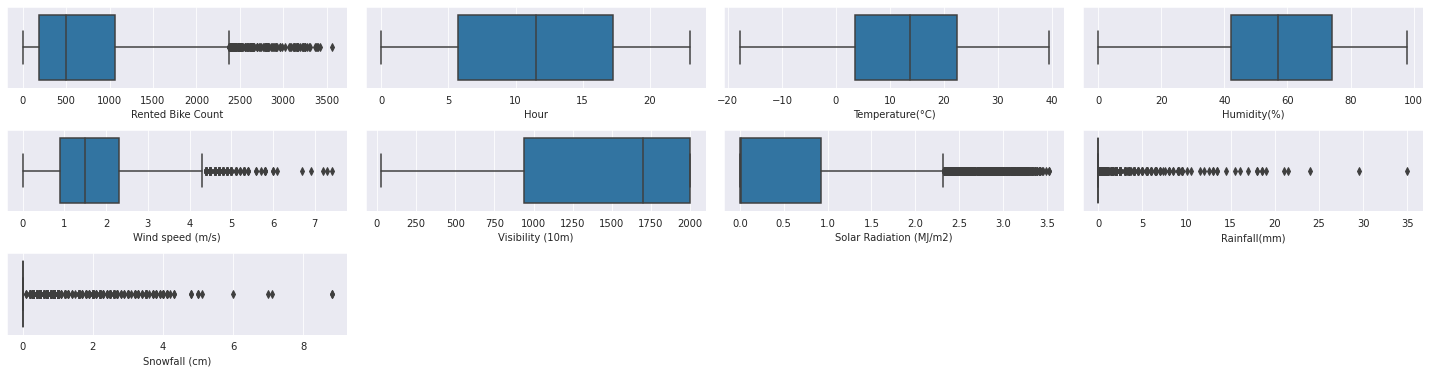

In [221]:
# looking for outliers of every fearture of dataset with the help of boxplot
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1 

for col in df.describe().columns:
    plt.subplot(6,4,num_it)
    sns.boxplot(df[col])
    num_it+=1
    
plt.tight_layout()

* **Rented Bike count** contains **outliers.**
* Wind Speed, Solar Radiation, Rainfall, and Snowfall contains outlier values which are acceptable.

In [222]:
# Rented bike count distribution graph

sns.distplot(df['Rented Bike Count'])

* **Rented bike count** column follow **right tail distribution.**

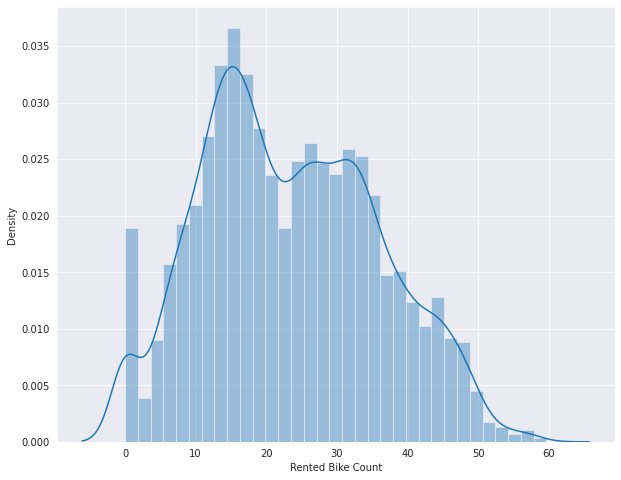

In [223]:
# square_root transformation

plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(df['Rented Bike Count']))

* after doing **squareroot of Rented Bike Count,** it follows **normal distribution**.

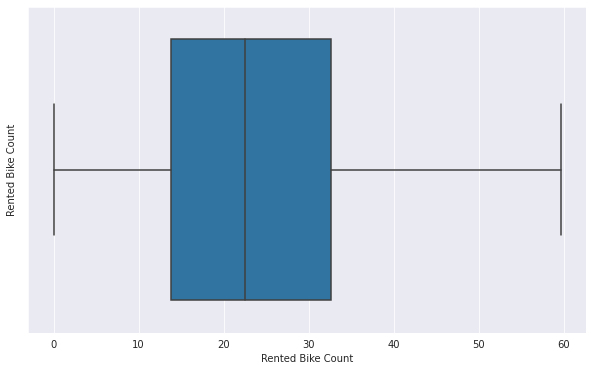

In [224]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))

plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(df['Rented Bike Count']))
plt.show()

* **after doing squareroot of Rented Bike Count no outliers detected**

##6. Extracting day, month, and day of week from Date column.

In [225]:
# extracting day,month, day of week and weekdays/weekend from date column

df['month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day_of_week'],axis=1)

# EDA (Exploratory Data Analysis)

##1. Univariate analysis

In [226]:
# Numeric Features

numeric_features= df.select_dtypes(exclude='object')

# Numeric Features info
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   month                    8760 non-null   int64  
 10  weekdays_weekend         8760 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 752.9 KB


In [227]:
# describing numeric feature

numeric_features.describe().transpose()

count         mean         std   min     25%  \
Rented Bike Count        8760.0   704.602055  644.997468   0.0  191.00   
Hour                     8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)          8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)              8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)         8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)         8760.0  1436.825799  608.298712  27.0  940.00   
Solar Radiation (MJ/m2)  8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)             8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)            8760.0     0.075068    0.436746   0.0    0.00   
month                    8760.0     6.526027    3.448048   1.0    4.00   
weekdays_weekend         8760.0     0.290411    0.453978   0.0    0.00   

                             50%      75%      max  
Rented Bike Count         504.50  1065.25  3556.00  
Hour                       11.50    17.25    23.00  
Temperature(°C)            13.70    22.50    39.40  
Humidity(%)                57.00    74.00    98.00  
Wind speed (m/s)            1.50     2.30     7.40  
Visibility (10m)         1698.00  2000.00  2000.00  
Solar Radiation (MJ/m2)     0.01     0.93     3.52  
Rainfall(mm)                0.00     0.00    35.00  
Snowfall (cm)               0.00     0.00     8.80  
month                       7.00    10.00    12.00  
weekdays_weekend            0.00     1.00     1.00

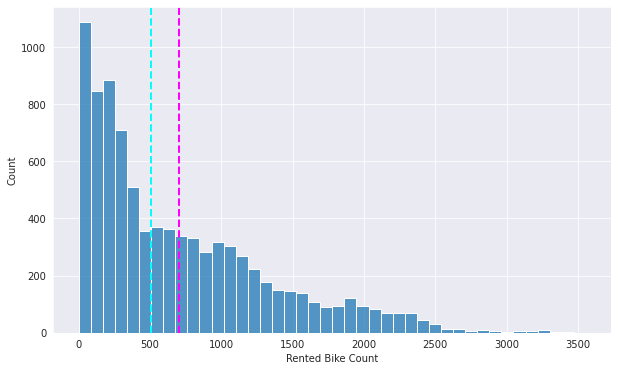

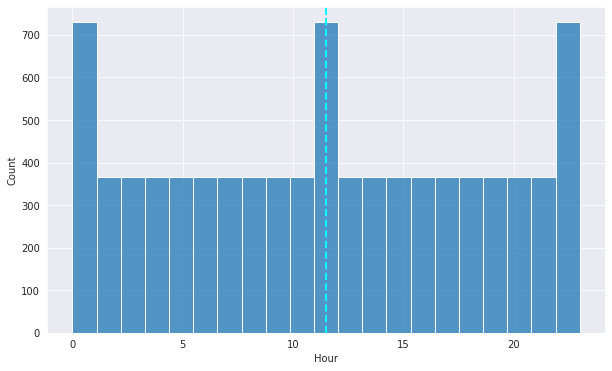

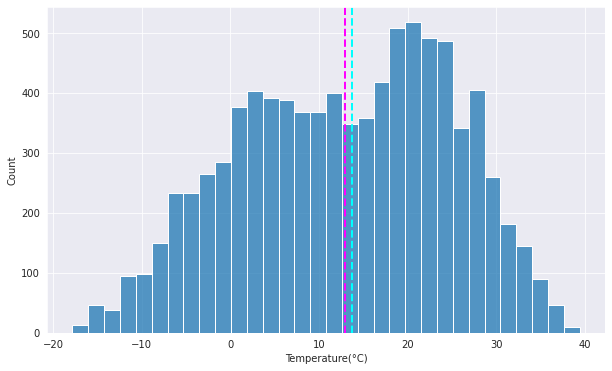

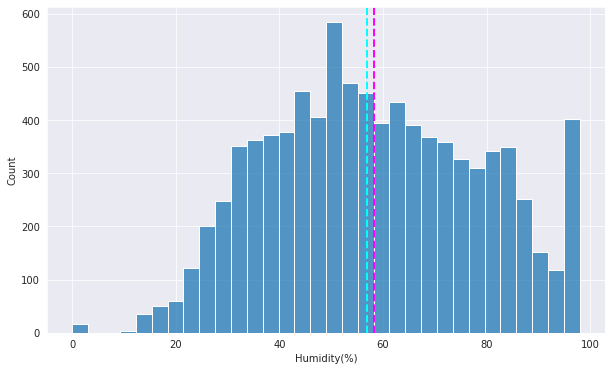

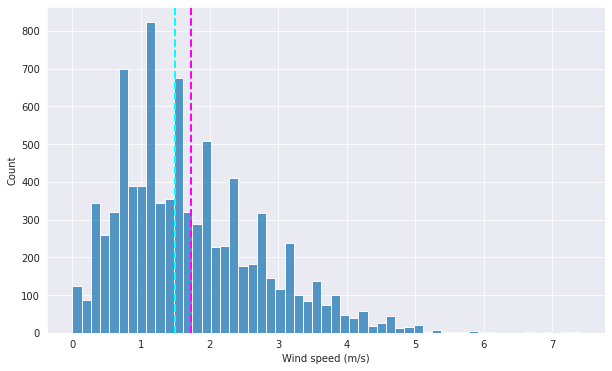

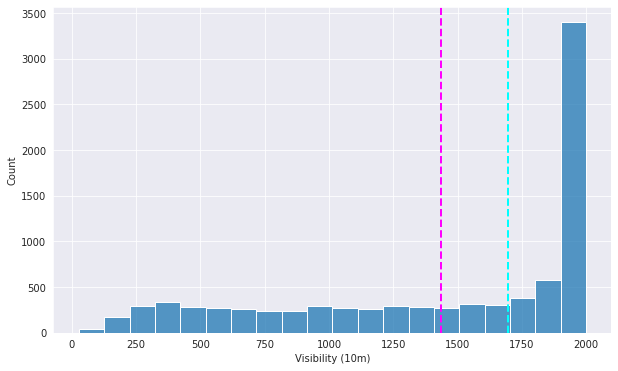

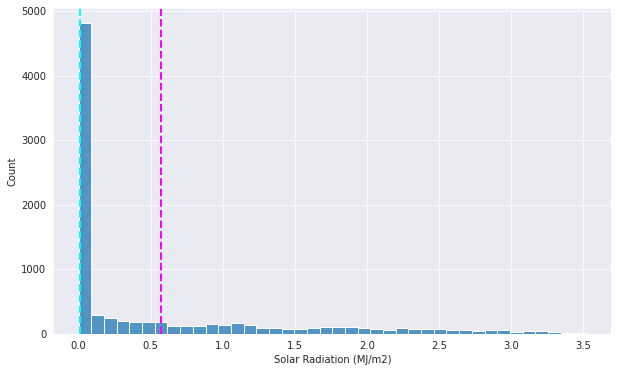

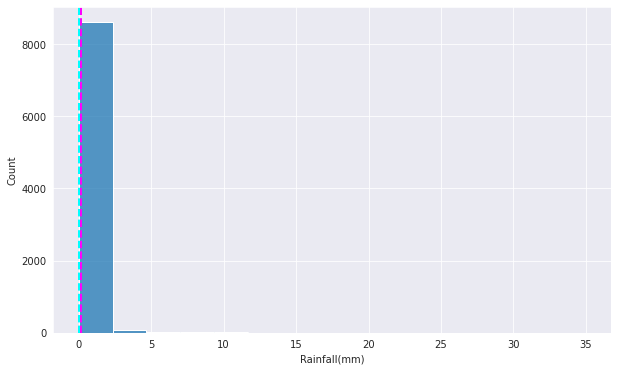

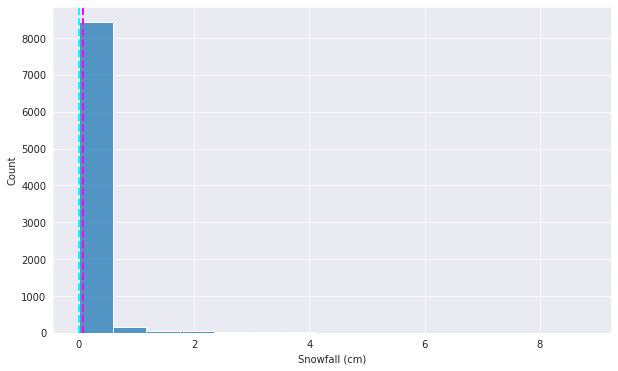

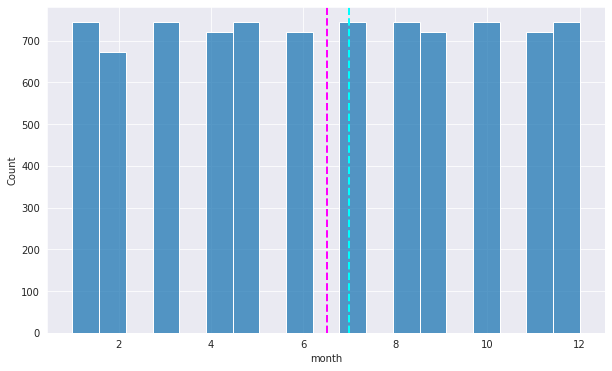

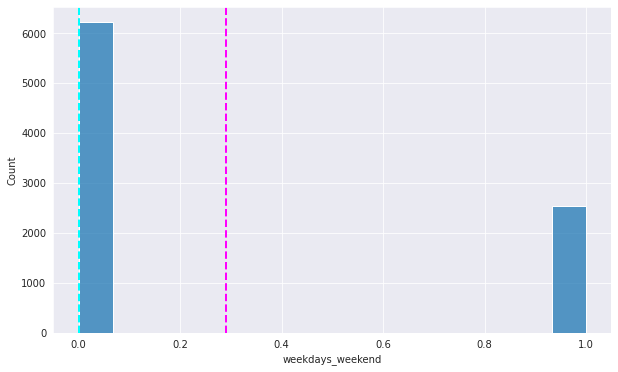

In [228]:
#plotting histogram

for col in numeric_features[:]:
  sns.histplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)   
  plt.show()

In [229]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

  Seasons     Holiday Functioning Day  month  weekdays_weekend  
0  Winter  No Holiday             Yes      1                 0  
1  Winter  No Holiday             Yes      1                 0  
2  Winter  No Holiday             Yes      1                 0  
3  Winter  No Holiday             Yes      1                 0  
4  Winter  No Holiday             Yes      1                 0

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

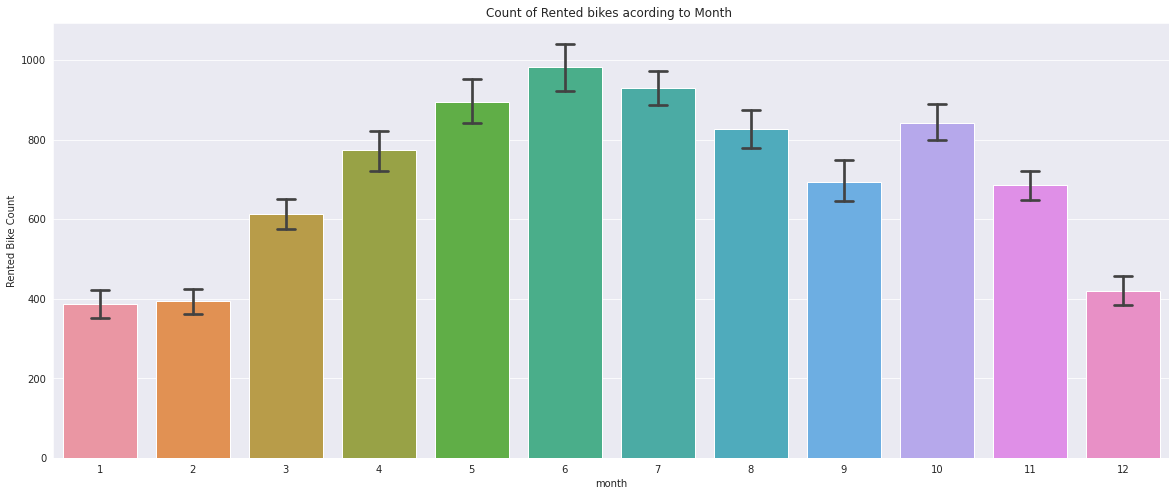

In [230]:
#MONTH
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='month',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

* From the above bar plot we can clearly say that in month of june, there is high demand of rental bikes

##2. Bivariate Analysis

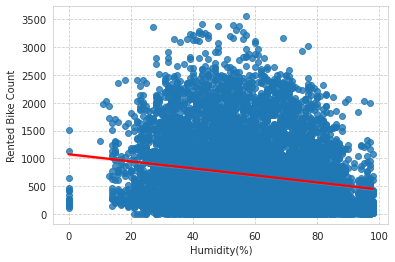

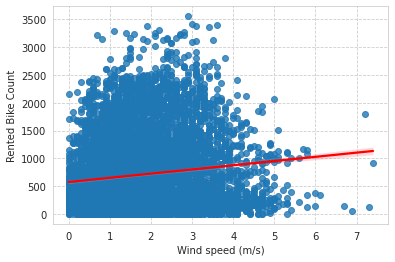

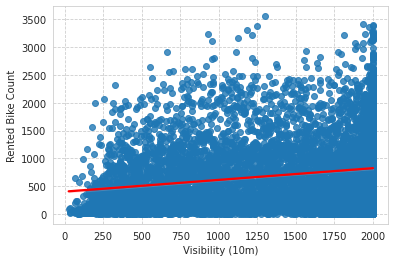

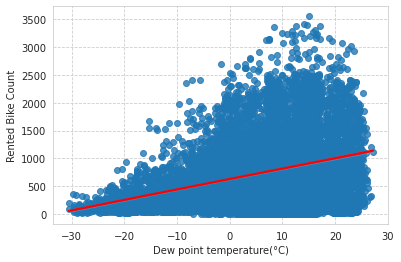

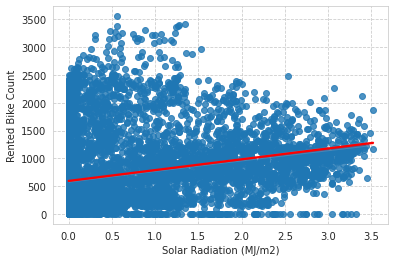

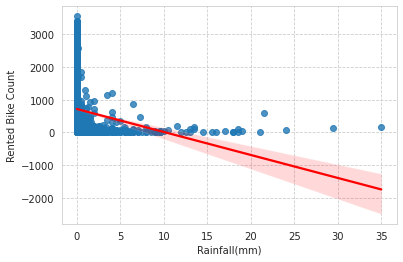

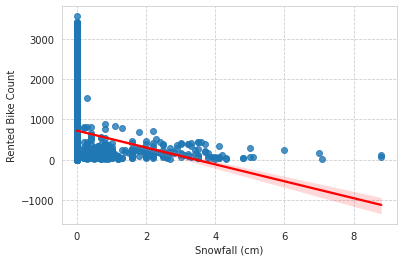

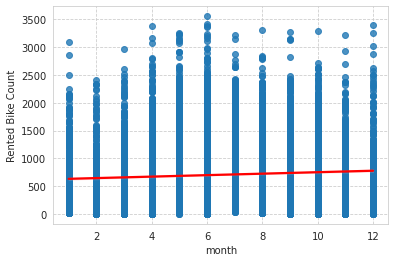

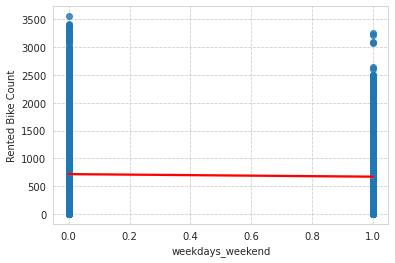

In [31]:
# ploting Regression plot of each columns of dataset v/s rented bike count columns

for col in numeric_features[:]:
  if col == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=df[col],y=df["Rented Bike Count"],line_kws={"color": "red"})
  
  plt.show()

In [32]:
#Extracting categorical features
categorical_features= df.select_dtypes(include='object')
categorical_features

Seasons     Holiday Functioning Day
0     Winter  No Holiday             Yes
1     Winter  No Holiday             Yes
2     Winter  No Holiday             Yes
3     Winter  No Holiday             Yes
4     Winter  No Holiday             Yes
...      ...         ...             ...
8755  Autumn  No Holiday             Yes
8756  Autumn  No Holiday             Yes
8757  Autumn  No Holiday             Yes
8758  Autumn  No Holiday             Yes
8759  Autumn  No Holiday             Yes

[8760 rows x 3 columns]

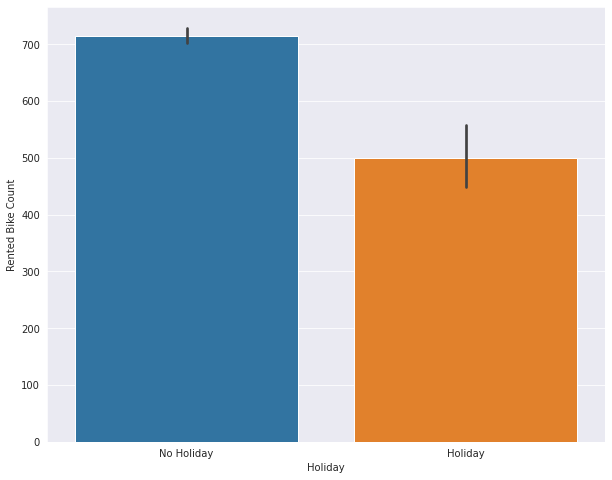

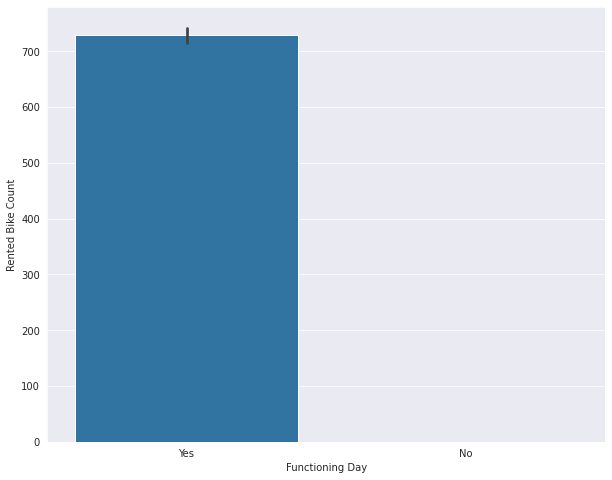

In [159]:
#ploting Box plot to visualize and trying to get information from plot
for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.barplot(x=df[col],y=df["Rented Bike Count"])
  plt.show()

* According to bargraph, During winter season demand of rental bike is less in comparision to other seasons
* On non holiday, slightly high demand of rental bikes in comparision to holiday.
* Very high demand of rentel bikes on functioning day, on the otherhand, no demand on non functioning day 

In [34]:
#checking counts of functioning day
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

Text(0.5, 1.0, 'Rented bike requirement during different seasons')

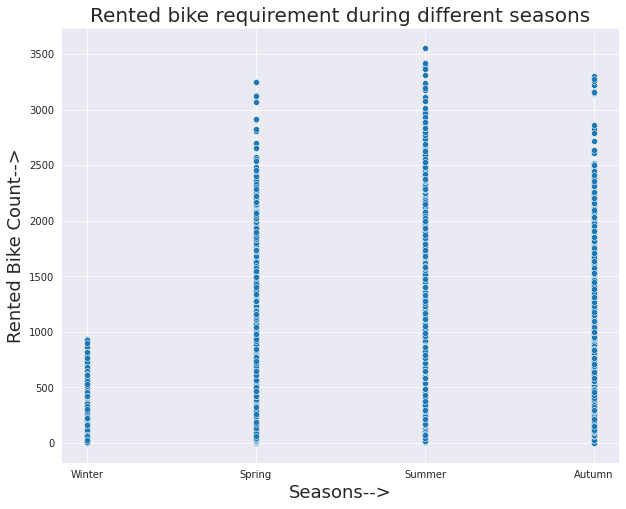

In [164]:
#ploting cat plot for more info
plt.figure(figsize=(10,8))
sns.scatterplot(x='Seasons',y='Rented Bike Count',data=df)
plt.xlabel('Seasons-->',fontsize=18)
plt.ylabel('Rented Bike Count-->',fontsize=18)
plt.title('Rented bike requirement during different seasons',fontsize=20)

Conclusion

we can clearly see that there is less demand of rented bike during winter season

In [167]:
#ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = df.groupby('Hour')['Rented Bike Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='*',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85);

Conclusion

High rise of Rented Bikes from 8:00 a.m to 9:00 p.m means people prefer rented bike during rush hour.
we can clearly see that demand rises most at 8 a.m and 6:00 p.m so we can say that that during office opening and closing time there is much high demand

#Encoding categorical columns

* 3 columns (Seasons, Holiday and Functioning Day) can be encoded.

In [37]:
#creating Dummy variable for categorical columns
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)
dummy_categorical_feature

Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0                  0               0               1                   1   
1                  0               0               1                   1   
2                  0               0               1                   1   
3                  0               0               1                   1   
4                  0               0               1                   1   
...              ...             ...             ...                 ...   
8755               0               0               0                   1   
8756               0               0               0                   1   
8757               0               0               0                   1   
8758               0               0               0                   1   
8759               0               0               0                   1   

      Functioning Day_Yes  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
...                   ...  
8755                    1  
8756                    1  
8757                    1  
8758                    1  
8759                    1  

[8760 rows x 5 columns]

In [38]:
#concating numeric columns and dummy columns and creating final df
final_df= pd.concat([dummy_categorical_feature,numeric_features],axis=1)

#showing head of final df
final_df.head()

Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0               0               0               1                   1   
1               0               0               1                   1   
2               0               0               1                   1   
3               0               0               1                   1   
4               0               0               1                   1   

   Functioning Day_Yes  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0                    1                254     0             -5.2           37   
1                    1                204     1             -5.5           38   
2                    1                173     2             -6.0           39   
3                    1                107     3             -6.2           40   
4                    1                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  month  \
0                      0.0           0.0            0.0      1   
1                      0.0           0.0            0.0      1   
2                      0.0           0.0            0.0      1   
3                      0.0           0.0            0.0      1   
4                      0.0           0.0            0.0      1   

   weekdays_weekend  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [39]:
#describing final DF
final_df.describe().transpose()

count         mean         std   min     25%  \
Seasons_Spring             8760.0     0.252055    0.434217   0.0    0.00   
Seasons_Summer             8760.0     0.252055    0.434217   0.0    0.00   
Seasons_Winter             8760.0     0.246575    0.431042   0.0    0.00   
Holiday_No Holiday         8760.0     0.950685    0.216537   0.0    1.00   
Functioning Day_Yes        8760.0     0.966324    0.180404   0.0    1.00   
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   
month                      8760.0     6.526027    3.448048   1.0    4.00   
weekdays_weekend           8760.0     0.290411    0.453978   0.0    0.00   

                               50%      75%      max  
Seasons_Spring                0.00     1.00     1.00  
Seasons_Summer                0.00     1.00     1.00  
Seasons_Winter                0.00     0.00     1.00  
Holiday_No Holiday            1.00     1.00     1.00  
Functioning Day_Yes           1.00     1.00     1.00  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80  
month                         7.00    10.00    12.00  
weekdays_weekend              0.00     1.00     1.00

<Figure size 2000x1600 with 0 Axes>

<Figure size 2000x1600 with 0 Axes>

<Figure size 2000x1600 with 0 Axes>

<Figure size 2000x1600 with 0 Axes>

<Figure size 2000x1600 with 0 Axes>

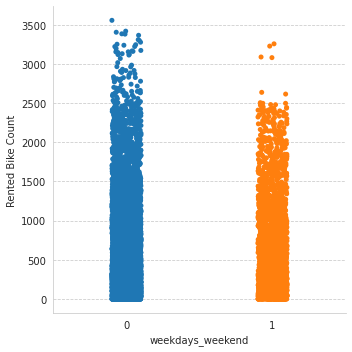

In [40]:
# ploting cat plot on some feature to get more information

feature_list=["Hour","Holiday",'Rainfall(mm)','Snowfall (cm)','weekdays_weekend']
for feature in feature_list:
  plt.figure(figsize=(10,8),dpi=200)
  sns.catplot(x=feature,y='Rented Bike Count',data=df)
  plt.show()

Conclusion:

From hour v/s rented bike

* we can clearly see there is high demand of Rented bike between the office hours.

From working-nonworking v/s rented bike

* As cleared from 2nd plot working days has comparatively high demand of rented bike as compared to non working day

From Rainfall v/s rented bike

* we can see that if Rainfall increase demand of Rented Bike Decreases

From Snowfall v/s rented bike

* we can see that if Snowfall increase demand of Rented Bike Decreases

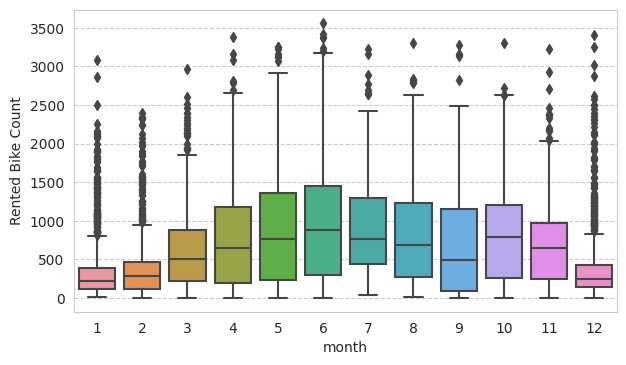

In [41]:
plt.figure(figsize=(7,4),dpi=100)
sns.boxplot(x='month',y='Rented Bike Count',data=df)
plt.show()

# Functions

## Creating Function to train linear models and calculate scores

In [42]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [43]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evalution Matrix=========================\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  print('\n================Evalution Matrix=========================\n')

  #appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()



## creating function to run different models

In [44]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print('\n================Evalution Matrix=========================\n')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = linear_model.predict(X_train)

    print('\n================Evalution Matrix=========================\n')

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    #ploting 
    print('\
    =========================================================\
    Evalution Graph\
    ===================================================\n') 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

## creating function to get feature importance

In [45]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

## lime tablular

In [46]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 4.8 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=4c525725093084d6b4698df90ae9e7e8c0ed3746cf6b2bf57f7650b5dbcd7918
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [47]:
# LIME SECTION

import lime
import lime.lime_tabular
def LimeTabularExplainer_table(model,instance,num_features,dependent_var):
  
  # vaariable to store feature names
  # X=df.drop(dependent_var,axis=1)
  # feature_names =list(X.columns)
  X=X_test
  feature_names =list(X_test.columns)

  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='regression')

  # selecting the instace to explain
  choosen_instance = X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict, num_features=num_features)
  exp.show_in_notebook(show_table=True)

## Train | Test Split for LR

In [48]:
# Train - Spliting  data
X=final_df.drop(['Rented Bike Count'],axis=1)

In [49]:
y=np.sqrt(final_df['Rented Bike Count'])

In [50]:
#spliting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [51]:
#scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

# Linear Regresseion

In [52]:
from sklearn.linear_model import LinearRegression
#linear regression model

linear_model= LinearRegression()

In [53]:
train_linear_model(linear_model, X_train, y_train, X_test, y_test)


================Evalution Matrix=========================

MSE : 175590.55287332062
RMSE : 419.035264474627
R2 : 0.5729108337712393
Adjusted R2 :  0.5697661367350404

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



# Regularisation

## Lasso Regression

In [54]:
from sklearn.linear_model import Lasso

# finding the best parameters for lasso by gridsearchcv
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()
#setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)


================Evalution Matrix=========================

MSE : 175560.90711843758
RMSE : 418.9998891627987
R2 : 0.5729829411854939
Adjusted R2 :  0.569838775082856

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



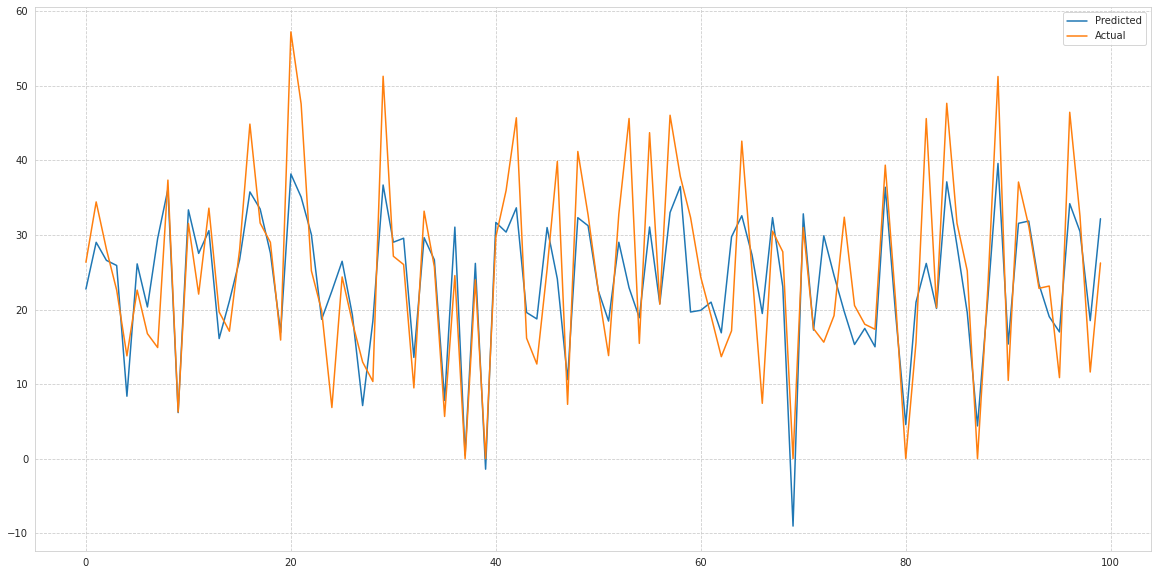

In [55]:
# calling train_linear_model to train,fit and evalution of lasso model
train_linear_model(lasso_grid,X_train,y_train,X_test,y_test)

# Ridge Regression

In [56]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)


================Evalution Matrix=========================

MSE : 175248.93506569506
RMSE : 418.6274418450074
R2 : 0.5737417512792726
Adjusted R2 :  0.5706031723655443

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



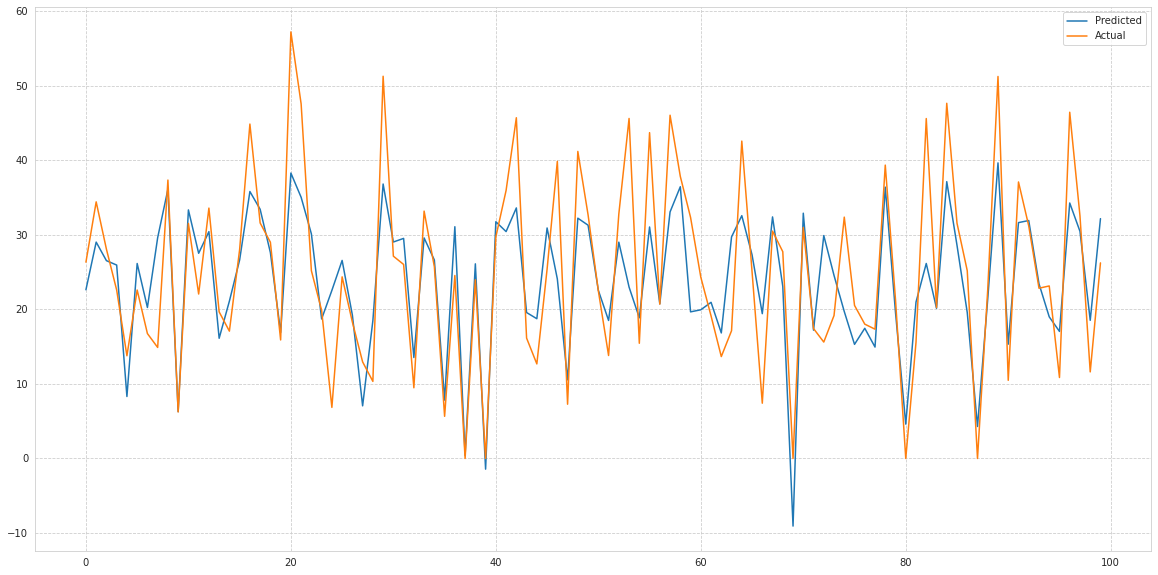

In [57]:
# calling train_linear_model to train,fit and evalution of ridge model

train_linear_model(ridge_grid,X_train,y_train,X_test,y_test)

# ElasticNet Regression

In [58]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)


================Evalution Matrix=========================

MSE : 175346.86749857932
RMSE : 418.74439399062925
R2 : 0.5735035500752621
Adjusted R2 :  0.5703632172640354

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



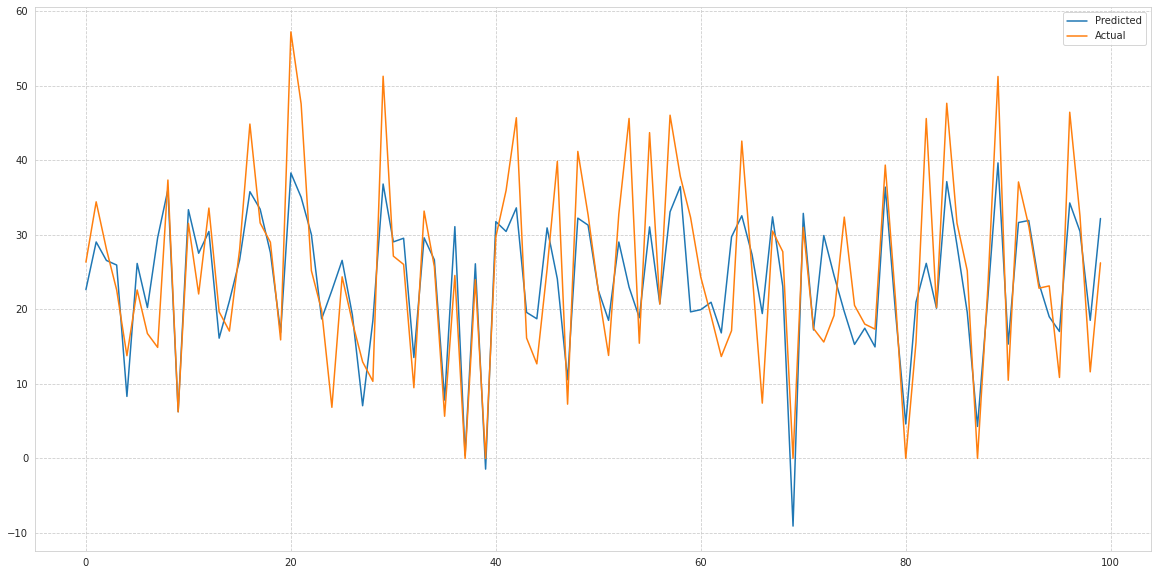

In [59]:
# calling train_linear_model to train,fit and evalution of elasticnet model
train_linear_model(elastic_grid,X_train,y_train,X_test,y_test)

# Polynomial Regression

In [60]:
#creating pipeline to convert x to polynomial feature and apply Linear Regression

from sklearn.pipeline import make_pipeline
#importing polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [61]:
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())

In [62]:
# calling train_linear_model to train,fit and evalution of polynomial model
train_linear_model(pipe,X_train,y_train,X_test,y_test)


================Evalution Matrix=========================

MSE : 116294.5376400951
RMSE : 341.01984933445607
R2 : 0.717136620934838
Adjusted R2 :  0.7150538717102441

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



# Decision Tree Regression

In [63]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
#creating decision tree model
dt_model = DecisionTreeRegressor()
#calling run_model to train,fit and evalution of decision tree model
run_model(dt_model,X_train,y_train,X_test,y_test)


================Evalution Matrix=========================

MSE : 23.35146916601143
RMSE : 4.832335787795735
R2 : 0.8475584584554885
Adjusted R2 :  0.8464360172844291

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



In [65]:
#getting features importance of decision tree
get_features_importance(dt_model,X)

# Random Forest

In [66]:
#importing Random forest
from sklearn.ensemble import RandomForestRegressor

In [67]:
#creating model of random forest
rf_model = RandomForestRegressor()

In [68]:
#creating param dict to check random forest with diffirent value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [69]:
#creating rf_grid model to run rf model with gridsearch
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 18.361664998286795
RMSE : 4.285051341382831
R2 : 0.8801325733398881
Adjusted R2 :  0.8792499783897907

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



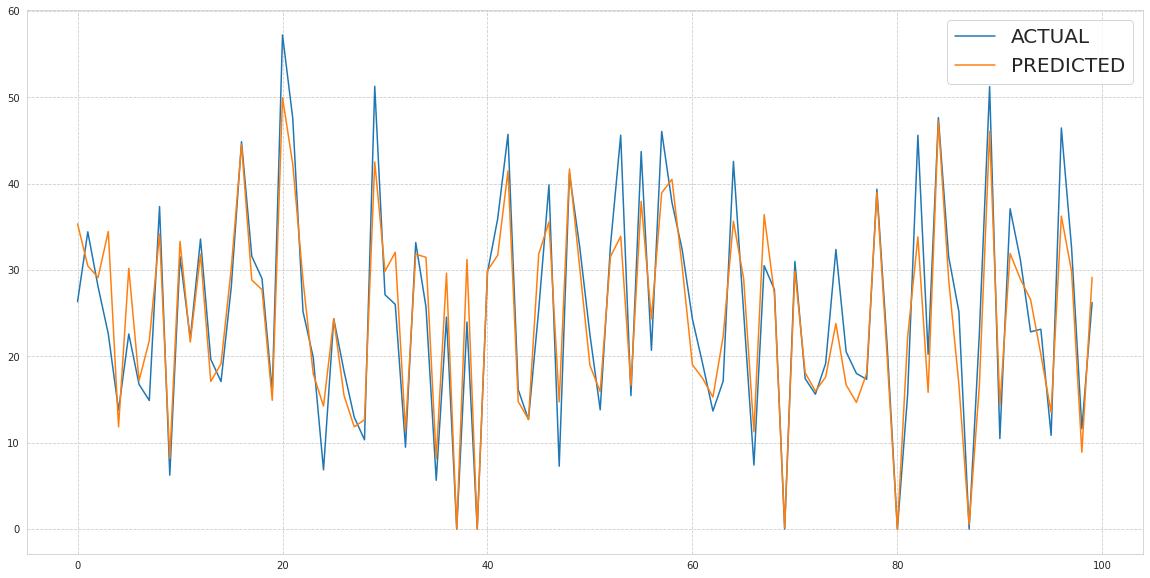

In [70]:
#calling run_model to train,fit and evalution of decision tree model
run_model(rf_grid,X_train,y_train,X_test,y_test)

In [71]:
#optimal rf model
optimal_rf_model=rf_grid.best_estimator_

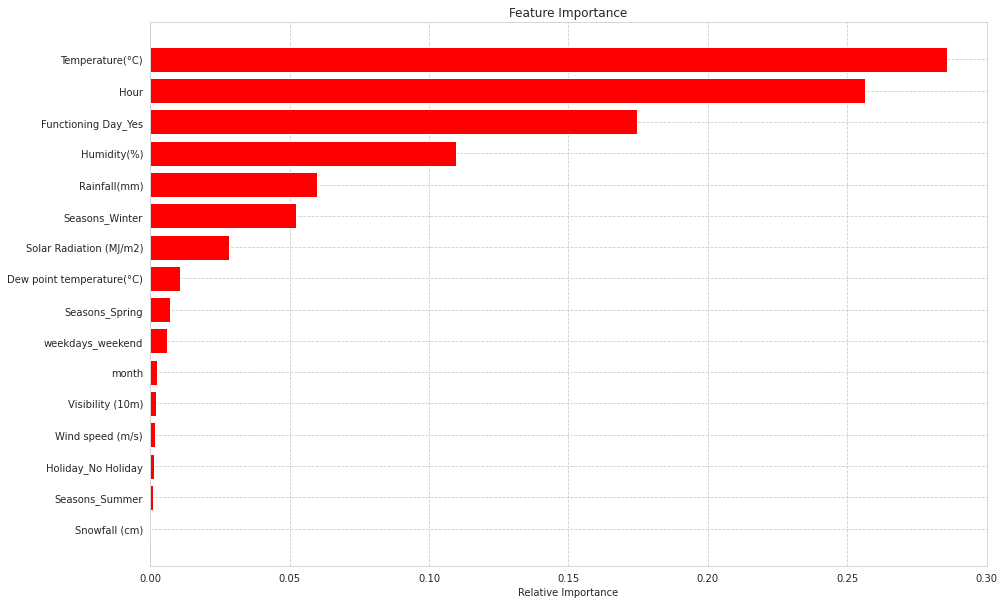

In [72]:
#getting and visualizing features importance  of rf model
get_features_importance(optimal_rf_model,X)

# Gradient Boosting

In [73]:
#importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

In [74]:
#creating model of Gradient Boosting
gb_model=GradientBoostingRegressor()

In [75]:
# creating param dict to check diffirent value of parameter
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [76]:
#grid search for gradient bossting
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)

In [77]:
#calling run_model to train,fit and evalution of gradient boosting model
run_model(gb_grid,X_train,y_train,X_test,y_test)


================Evalution Matrix=========================

MSE : 15.144092693384964
RMSE : 3.891541172001777
R2 : 0.9011373194953927
Adjusted R2 :  0.9004093844341531

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



In [78]:
#getting best estimator of GB model given by gb_grid model
optimal_gb_model=gb_grid.best_estimator_

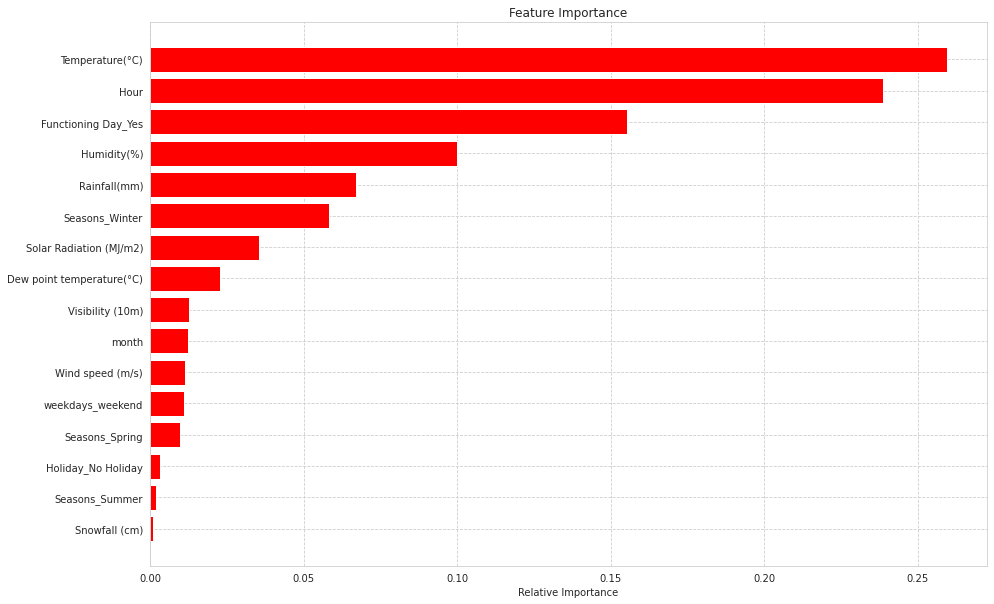

In [79]:
#getting and visualizing features_importance of gradient boosting
get_features_importance(optimal_gb_model,X)

# eXtreme Gradient Boosting

In [80]:
#importing XGBoost Regressor
from xgboost import XGBRegressor

In [81]:
#creating Xgboost model
xgb_model=XGBRegressor()

In [82]:
#creating param dict for gridsearch
n_estimators=[80,100,150]
max_depth=[15,20,30]


params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [83]:
#creating xgb grid model
xgb_grid= GridSearchCV(xgb_model,param_grid=params,verbose=0)

[16:32:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:32:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:32:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:32:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:32:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:32:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:32:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:32:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

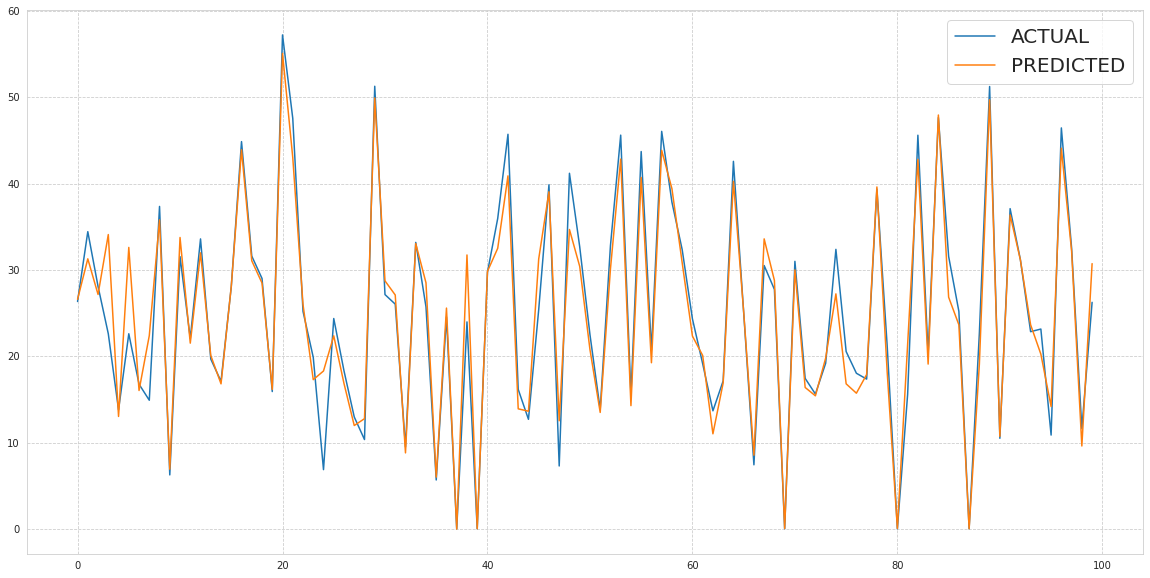

In [84]:
#calling run_model to train,fit and evalution of xgb_grid model
run_model(xgb_grid,X_train,y_train,X_test,y_test);

In [85]:
# #getting best estimator of xgb model given by xgb grid model
# optimal_xgb_model=xgb_grid.best_estimator_

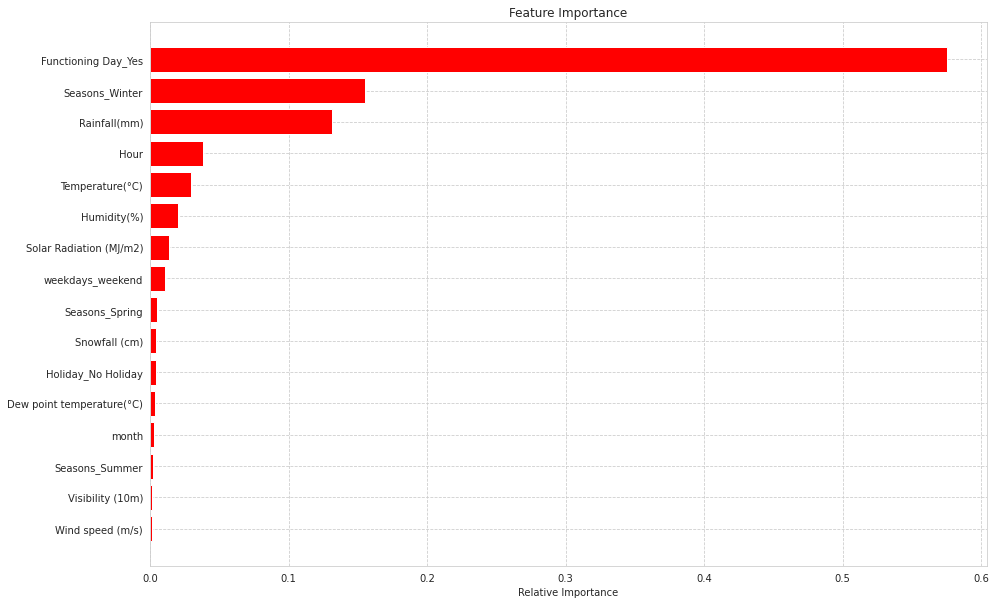

In [86]:
#getting best param of rf model given by xgb_grid model
get_features_importance(xgb_grid.best_estimator_,X)

# Combined Evaluation Matrix of All the models

In [87]:
#creating dictionary to store all the metrices 
all_model_matrices={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}

In [88]:
#list of all model made ,'Gradient_Boosting',,'CATBoost'
model_name=['Linear','Lasso','Ridge','Elasticnet','Polynomial','Decision_Tree','Random_Forest','Gradient_Boosting','Xtreme_GB']

In [89]:
#converting dictionary to dataframe fro easy visual
matrices_df=pd.DataFrame.from_dict(all_model_matrices,orient="index",columns=model_name)

In [90]:
matrices_df

Linear          Lasso          Ridge  \
Mean_square_error       175590.552873  175560.907118  175248.935066   
Root_Mean_square_error     419.035264     418.999889     418.627442   
R2                           0.572911       0.572983       0.573742   
Adjusted_R2                  0.569766       0.569839       0.570603   

                           Elasticnet     Polynomial  Decision_Tree  \
Mean_square_error       175346.867499  116294.537640      23.351469   
Root_Mean_square_error     418.744394     341.019849       4.832336   
R2                           0.573504       0.717137       0.847558   
Adjusted_R2                  0.570363       0.715054       0.846436   

                        Random_Forest  Gradient_Boosting  Xtreme_GB  
Mean_square_error           18.361665          15.144093  11.711108  
Root_Mean_square_error       4.285051           3.891541   3.422150  
R2                           0.880133           0.901137   0.923548  
Adjusted_R2                  0.879250           0.900409   0.922985

In [91]:
#transposing matrices_df for easy and clear view and saving that as new final matrices df
final_matrices=matrices_df.transpose().reset_index().rename(columns={'index':'Models'})

In [92]:
final_matrices

Models  Mean_square_error  Root_Mean_square_error        R2  \
0             Linear      175590.552873              419.035264  0.572911   
1              Lasso      175560.907118              418.999889  0.572983   
2              Ridge      175248.935066              418.627442  0.573742   
3         Elasticnet      175346.867499              418.744394  0.573504   
4         Polynomial      116294.537640              341.019849  0.717137   
5      Decision_Tree          23.351469                4.832336  0.847558   
6      Random_Forest          18.361665                4.285051  0.880133   
7  Gradient_Boosting          15.144093                3.891541  0.901137   
8          Xtreme_GB          11.711108                3.422150  0.923548   

   Adjusted_R2  
0     0.569766  
1     0.569839  
2     0.570603  
3     0.570363  
4     0.715054  
5     0.846436  
6     0.879250  
7     0.900409  
8     0.922985

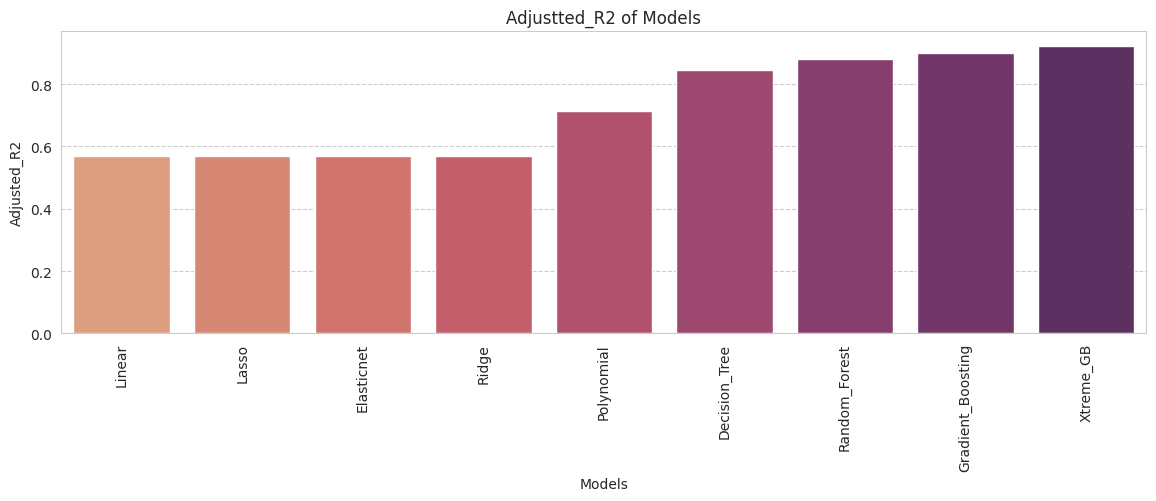

In [93]:
#creating bar plot to visualize the Adjusted R2 of model 
plt.figure(figsize=(14,4),dpi=100)
sns.barplot(x='Models',y='Adjusted_R2',data=final_matrices.sort_values('Adjusted_R2'),palette="flare").set(title='Adjustted_R2 of Models')
plt.xticks(rotation=90);

# Model Explainibility

In [94]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.3 MB/s 


In [95]:
from sklearn.tree import export_graphviz
import shap 
sns.set_style('darkgrid')

In [96]:
for_instance=2

In [97]:
# shape for xgboost model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(xgb_grid.best_estimator_)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])

In [98]:
#shape for catboost model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(cb_model)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])

NameError: ignored

In [ ]:
#shap for lightGBM model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(lgbr_grid.best_estimator_)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])